In [34]:
% some housekeeping stuff
register_graphics_toolkit ("gnuplot");
available_graphics_toolkits ();
graphics_toolkit ("gnuplot")
clear
% end of housekeeping

# Titration of Na2CO3

100 mL 0.01 M Na2CO3 titrated with 0.1 M HCl.  you can write the charge balance

$[\mathrm{Na}^+]+[\mathrm{H}^+]=[\mathrm{OH}^-]+[\mathrm{Cl}^-]+[\mathrm{HCO_3}^-]+2[\mathrm{CO_3}^{2-}]$

If we specify the pH we know all the terms except for chloride concentration, so we can solve for chloride concentration versus pH (our titration curve).

For the two charged carbonate species their concentrations are (from alpha times total carbonate ($C_T=0.01$))

$[\mathrm{HCO_3^-}]=\dfrac{C_TK_{a1}[\mathrm{H^+}]}{[\mathrm{H}^+]^2+K_{a1}[\mathrm{H^+}]+K_{a1}K_{a2}}$

$[\mathrm{CO_3^{2-}}]=\dfrac{C_TK_{a1}K_{a2}}{[\mathrm{H}^+]^2+K_{a1}[\mathrm{H^+}]+K_{a1}K_{a2}}$

Ignore dilution we can figure out the volume by dividing the moles of chloride by the titrant concentration (0.1 M).


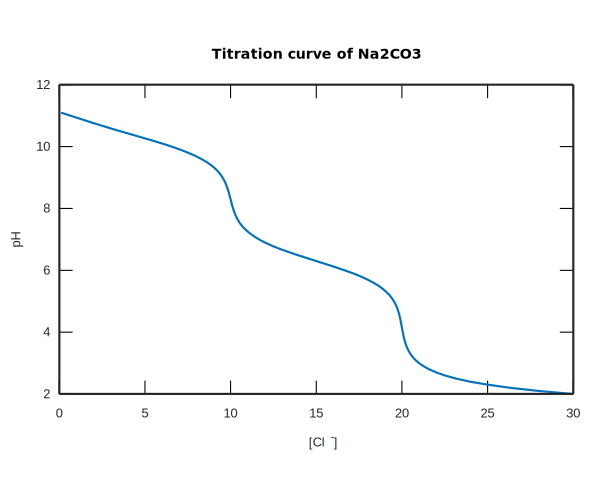

In [35]:
%plot -s 600,500 -f 'svg'
pKa1=6.3; pKa2=10.3; Kw=10^-14; 
Ka1=10^-pKa1; Ka2=10^-pKa2;
pH=2:0.1:12; H=10.^-pH; OH=Kw./H;
CT=0.01; 

denominator=H.^2+Ka1*H+Ka1*Ka2;
alphaHA=(Ka1*H)./denominator; HCO3=CT*alphaHA;
alphaA=(Ka1*Ka2)./denominator; CO3=CT*alphaA;

Na=2*CT; % two sodium per mole of Na2CO3
Cl=H+Na-HCO3-OH-2*CO3;
molCl=Cl*0.1; % ignore diluation. just multiply the conc by the 100 mL.
volCl=1000*(molCl./0.1); % divide moles by titrant conc and multiply by 1000 to get into mL.

% only plot the positive values
c=0;
for i=1:size(Cl,2)
if Cl(i)>=0; c=c+1; Clpos(c)=Cl(i); pHpos(c)=pH(i); volClpos(c)=volCl(i); end
end

plot(volClpos,pHpos,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12)
xlabel('[Cl^-]','fontsize',12);
ylabel('pH','fontsize',12)
title('Titration curve of Na2CO3')

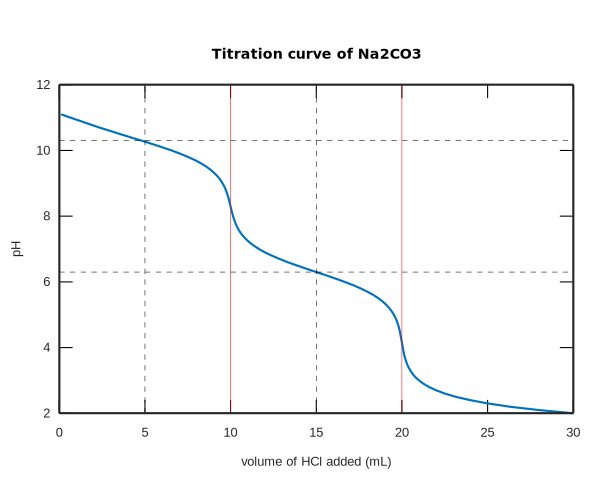

In [36]:
plot(volClpos,pHpos,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12)
xlabel('volume of HCl added (mL)','fontsize',12);
ylabel('pH','fontsize',12)
title('Titration curve of Na2CO3')
hold on
%pH=pKa at half titration points
plot([5 5],[2 12],'k--'); plot([0 30],[10.3 10.3],'k--')
plot([15 15],[2 12],'k--'); plot([0 30],[6.3 6.3],'k--')
%two equivalennce points
plot([10 10],[2 12],'r-')
plot([20 20],[2 12],'r-')